In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Training-data" data-toc-modified-id="Training-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Training data</a></span><ul class="toc-item"><li><span><a href="#All-training-imgs" data-toc-modified-id="All-training-imgs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>All training imgs</a></span></li></ul></li><li><span><a href="#Visualize-defects" data-toc-modified-id="Visualize-defects-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize defects</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#From-RLE-to-Masks" data-toc-modified-id="From-RLE-to-Masks-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>From RLE to Masks</a></span></li><li><span><a href="#Visualize-one-faulty-image" data-toc-modified-id="Visualize-one-faulty-image-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualize one faulty image</a></span></li><li><span><a href="#Visualize-ClassId-defects" data-toc-modified-id="Visualize-ClassId-defects-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualize ClassId defects</a></span></li></ul></li><li><span><a href="#Export" data-toc-modified-id="Export-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Export</a></span></li></ul></div>

In [ ]:
#export
from exp.nb_01 import *

In [ ]:
print_competition_data()

data/severstal/sample_submission.csv
data/severstal/train.csv
data/severstal/labels
data/severstal/train_images
data/severstal/test_images
data/severstal/.ipynb_checkpoints
data/severstal/codes.txt


The files in detail: 

- **train_images/** - folder of training images (12.5k images)
- **test_images/** - folder of test images to segment and classify (5506 images)
- **train.csv** - training annotations which provide segments for defects (`ClassId = [1, 2, 3, 4]`)
- **sample_submission.csv** - a sample submission file in the correct format; note, each `ImageId` 4 rows, one for each of the 4 defect classes


In [ ]:
#export
train_path, test_path = path/"train_images", path/"test_images"
train_pfiles, test_pfiles = get_image_files(train_path), get_image_files(test_path)

In [ ]:
train_pfiles, test_pfiles

((#12568) [Path('data/severstal/train_images/054190eb2.jpg'),Path('data/severstal/train_images/73aa2aa79.jpg'),Path('data/severstal/train_images/69f87ba66.jpg'),Path('data/severstal/train_images/8718d384c.jpg'),Path('data/severstal/train_images/c27fcd22a.jpg'),Path('data/severstal/train_images/978198cd9.jpg'),Path('data/severstal/train_images/1dc68a7a7.jpg'),Path('data/severstal/train_images/3c10eb7fa.jpg'),Path('data/severstal/train_images/232a62357.jpg'),Path('data/severstal/train_images/da2c63b68.jpg')...],
 (#5506) [Path('data/severstal/test_images/f1d98dffe.jpg'),Path('data/severstal/test_images/9fcc459b7.jpg'),Path('data/severstal/test_images/34a6b72e3.jpg'),Path('data/severstal/test_images/04ac89bbc.jpg'),Path('data/severstal/test_images/e43f63abf.jpg'),Path('data/severstal/test_images/461244df0.jpg'),Path('data/severstal/test_images/ae99717a3.jpg'),Path('data/severstal/test_images/251381c73.jpg'),Path('data/severstal/test_images/203971df8.jpg'),Path('data/severstal/test_images/

# Training data

Each Image may have **no defects**, a defect of a **single class**, or **defects of multiple classes** (`ClassId`).

The `train.csv` file contains the informations about the faulty images. The columns are:

- **ImageId**: image name

- **ClassId**: the class type

- **EncodedPixels**: the encoded pixels follows a run-length encoding rule, a sequence of pair values that contains a start position and a run length with the space as the delimiter. E.g. `1 3 10 5` means pixels `(1,2,3)` and `(10,11,12,13,14)`.  

In [ ]:
train = pd.read_csv(path/"train.csv")

In [ ]:
print(train.shape)
train.head()

(7095, 3)


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 30370 24 30626 24 30882 24 31139 23 31395 23 31651 23 31907 23 32163 23 32419 23 32675 23 77918 27 78174 55 78429 60 78685 64 78941 68 79197 72 79452 77 79708 81 79964 85 80220 89 80475 94 80731 98 80987 102 81242 105 81498 105 81754 104 82010 104 82265 105 82521 31 82556 69 82779 27 82818 63 83038 22 83080 57 83297 17 83342 50 83555 13 83604 44 83814 8 83866 37 84073 3 84128 31 84390 25 84652 18 84918 8 85239 10 85476 29 85714 47 85960 57 86216 57 86471 58 86727 58 86983 58 87238 59 87494 59 87750 59 88005 60 88261 60 88517 60 88772 61 89028 53...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 110 19859 110 20115 110 20371 110 20627 110 20883 110 21139 110 21395 110 21651 110 21962 55 293125 251 293381 251 293637 251 293893 251 294149 251 294405 251 294661 251 294917 251 295173 251 295429 251 295685 251 295941 251 296197 251 296453 251 296709 251 296965 251 297221 251 297477 251 297733 251 297989 251 298245 251 298564 188 298945 63
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 38863 28 39119 28 39375 29 39631 29 39887 29 40143 29 40399 29 40655 30 40911 30 41167 30 41423 30 41679 31 41935 31 42191 31 42447 31 42703 31 42960 31 43216 31 43472 31 43728 31 43984 31 44240 32 44496 32 44752 32 45008 32 45264 33 45520 33 45776 33 46032 33 46288 33 46544 34 46803 31 47065 25 47327 19 47588 15 47850 9 48112 3 62667 12 62923 23 63179 23 63348 3 63435 23 63604 7 63691 23 63860 11 63947 23 64116 15 64203 23 64372 19 64459 23 64628 24 64715 23 64884 28 64971 23 65139 33 65227 23 65395 37 65483 23 65651 41 65740 22 65907 45 65996 22...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 133248 13 133503 16 133757 19 134012 22 134267 24 134522 26 134777 29 135032 31 135287 34 135542 36 135796 40 136050 43 136304 46 136558 50 136812 54 137066 56 137320 59 137574 61 137828 63 138082 65 138336 68 138590 70 138845 71 139101 71 139356 73 139612 73 139868 73 140123 74 140379 74 140634 75 140890 75 141145 77 141400 78 141654 80 141909 81 142164 82 142418 84 142673 85 142928 86 143182 88 143437 89 143692 90 143946 93 144201 94 144456 95 144710 97 144965 98 145220 99 145474 101 145729 103 145983 105 146237 107 146491 109 146745 112 1469...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468 92 230623 10 230724 95 230845 11 230869 28 230979 97 231094 63 231235 97 231344 70 231490 99 231593 79 231746 183 232002 184 232257 186 232513 186 232769 185 233024 186 233280 185 233535 186 233791 185 234047 185 234302 186 234558 186 234813 186 235069 186 235327 184 235586 181 235845 177 236103 175 236362 172 236621 78 236714 71 236880 57 236972 61 237139 44 237229 52 237397 32 237486 11 237513 16 237656 19 237744 3 237915 6


Every row of the DataFrame is a unique `(ImageId, ClassId)`. If there's duplicates the algorithms didn't work.

In [ ]:
train["ImageId_ClassId"] = train["ImageId"] + "_" + train["ClassId"].astype('str')
if train.ImageId_ClassId.duplicated().any():
    print("Duplicates founded.")

In [ ]:
train.dtypes

ImageId            object
ClassId             int64
EncodedPixels      object
ImageId_ClassId    object
dtype: object

In [ ]:
class_count = train["ClassId"].value_counts().sort_index()
class_count.index.set_names("ClassId", inplace=True)
class_count = class_count.to_frame()
class_count.rename(columns={"ClassId": "num"}, inplace=True)
class_count.assign(freq = lambda df: df["num"] / df["num"].sum())

,num,freq
ClassId,,
1,897,0.126427
2,247,0.034813
3,5150,0.725863
4,801,0.112896


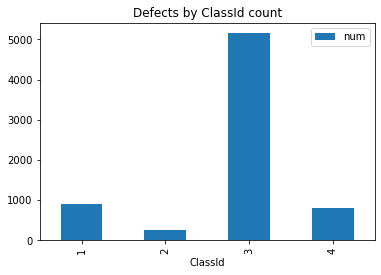

In [ ]:
class_count.plot.bar(title="Defects by ClassId count")
plt.show()

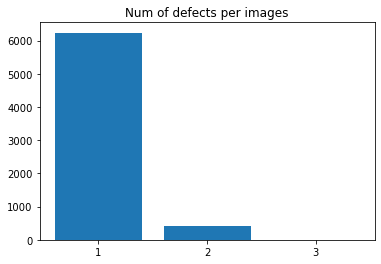

{1: 6239, 2: 425, 3: 2}

In [ ]:
counts = train["ImageId"].value_counts()
hist_counts, _ = np.histogram(counts.values, bins=3)
nums = ['1', '2', '3']
plt.bar(x=nums, height=hist_counts)
plt.title("Num of defects per images")
plt.show()

{i+1: c for i, c in enumerate(hist_counts)}

Images have at least one defect and there's a small number of images with two or three defects. 

In [ ]:
print("Multiple defects:")
imgs_class_agg = train.groupby("ImageId").apply(lambda x: x["ClassId"].values.tolist())

pairs = imgs_class_agg[imgs_class_agg.map(lambda v: len(v)==2)].values.tolist()
triples = imgs_class_agg[imgs_class_agg.map(lambda v: len(v)==3)].values.tolist()

p = Counter(map(lambda l: (l[0], l[1]), pairs))
t = Counter(map(lambda l: (l[0], l[1], l[2]), triples))

print("\n".join([f"ClassId {ids} counts {count} images" for ids, count in p.most_common()]))
print("\n".join([f"ClassId {ids} counts {count} images" for ids, count in t.most_common()]))

Multiple defects:


NameError: name 'train' is not defined

## All training imgs

As we can see below, there're `7095` defects in `6666` images. 

In [ ]:
train.describe(include='all')[:2].T

,count,unique
ImageId,7095,6666
ClassId,7095,NaN
EncodedPixels,7095,7095
ImageId_ClassId,7095,7095


In [ ]:
#export
def get_train_df(only_faulty=False):
    """
    Get training DataFrame with all the images in data/train_images.
    Returns only the faulty images if `only_faulty`.
    """
    train = pd.read_csv(path/"train.csv")
    train["ImageId_ClassId"] = train["ImageId"] + "_" + train["ClassId"].astype('str')
    if only_faulty: return train
    
    img_names = [ img_path.name for img_path in train_pfiles ]
    df_all = pd.DataFrame({'ImageId': img_names})
    train_all = pd.merge(df_all, train, on="ImageId", how="outer", indicator=True)
    # Renaming and fillna
    train_all.rename(columns={'_merge': 'status'}, inplace=True)
    rename_dict = {"both": "faulty", "left_only": "no_faulty"}
    train_all["status"] = train_all["status"].cat.rename_categories(rename_dict)
    train_all.ClassId.fillna(0, inplace=True)
    train_all.ClassId = train_all.ClassId.astype('int64')
    # train_all.EncodedPixels.fillna(-1, inplace=True)    

    return train_all

In [ ]:
#export
train = get_train_df(only_faulty=True)
train_all = get_train_df()

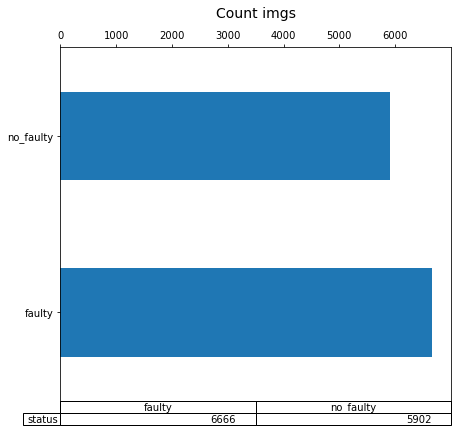

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6.5))
ax.set_title("Count imgs", pad=30, fontdict={'fontsize':14})
ax.xaxis.tick_top()  # Display x-axis ticks on top

(
    train_all[['ImageId', 'status']]
     .drop_duplicates()
     .status.value_counts().iloc[:-1]
     .plot.barh(table=True, ax=ax)
);

In [ ]:
train_all.head()

,ImageId,ClassId,EncodedPixels,ImageId_ClassId,status
0,054190eb2.jpg,3,214491 3 214743 7 214995 12 215247 16 215499 21 215751 25 216003 29 216254 35 216506 39 216758 44 217010 48 217262 52 217514 57 217766 61 218019 65 218274 66 218529 67 218784 69 219039 70 219293 73 219548 74 219803 76 220058 77 220313 78 220568 80 220823 81 221078 83 221333 84 221588 85 221843 87 222097 89 222352 91 222607 92 222862 93 223117 95 223372 96 223627 98 223882 99 224137 100 224392 101 224647 102 224901 103 225156 104 225411 105 225666 106 225921 107 226176 108 226431 109 226686 110 226941 110 227196 111 227451 112 227705 114 227960 115 228215 116 228470 117 228725 118 228980 11...,054190eb2.jpg_3,faulty
1,73aa2aa79.jpg,0,NaN,NaN,no_faulty
2,69f87ba66.jpg,0,NaN,NaN,no_faulty
3,8718d384c.jpg,0,NaN,NaN,no_faulty
4,c27fcd22a.jpg,0,NaN,NaN,no_faulty


In [ ]:
train_all.dtypes

ImageId              object
ClassId               int64
EncodedPixels        object
ImageId_ClassId      object
status             category
dtype: object

In [ ]:
train_all.describe(include='all')

,ImageId,ClassId,EncodedPixels,ImageId_ClassId,status
count,12997,12997.000000,7095,7095,12997
unique,12568,NaN,7095,7095,2
top,ef24da2ba.jpg,NaN,36160 49 36416 49 36672 49 36928 48 37184 48 37440 48 37696 48 37952 48 38208 47 38464 47 38720 47 38976 47 39232 47 39488 46 39744 46 40000 46 40256 46 40512 45 40768 45 41024 45 41280 45 41536 45 41792 44 42048 44 42304 44 42560 44 42816 44 43072 43 43328 43 43584 43 43840 35 44096 21 44352 7 46082 15 46338 43 46594 57 46850 58 47106 60 47362 61 47618 62 47874 64 48130 65 48386 66 48642 67 48898 69 49154 70 49410 71 49666 70 49922 68 50178 67 50434 65 50689 65 50945 63 51201 62 51457 60 51713 59 51969 57 52225 56 52481 54 52737 51 52993 46 53249 40 53505 35 53761 30 54017 24 54273 19 545...,bbcf45362.jpg_3,faulty
freq,3,NaN,1,1,7095
mean,NaN,1.542279,NaN,NaN,NaN
std,NaN,1.522783,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN
75%,NaN,3.000000,NaN,NaN,NaN


In [ ]:
#export
def get_train_pivot(df=None):
    """
    Summarize the training csv with ClassId as columns and values EncodedPixels
    """
    if not df: df = train
    train_pivot = df.pivot(index="ImageId", columns="ClassId", values="EncodedPixels")
    train_pivot["n"] = train_pivot.notnull().sum(1)
    return train_pivot

In [ ]:
train_pivot = get_train_pivot()
train_pivot.head(2)

ClassId,1,2,3,4,n
ImageId,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 30370 24 30626 24 30882 24 31139 23 31395 23 31651 23 31907 23 32163 23 32419 23 32675 23 77918 27 78174 55 78429 60 78685 64 78941 68 79197 72 79452 77 79708 81 79964 85 80220 89 80475 94 80731 98 80987 102 81242 105 81498 105 81754 104 82010 104 82265 105 82521 31 82556 69 82779 27 82818 63 83038 22 83080 57 83297 17 83342 50 83555 13 83604 44 83814 8 83866 37 84073 3 84128 31 84390 25 84652 18 84918 8 85239 10 85476 29 85714 47 85960 57 86216 57 86471 58 86727 58 86983 58 87238 59 87494 59 87750 59 88005 60 88261 60 88517 60 88772 61 89028 53...,NaN,NaN,NaN,1
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 110 19859 110 20115 110 20371 110 20627 110 20883 110 21139 110 21395 110 21651 110 21962 55 293125 251 293381 251 293637 251 293893 251 294149 251 294405 251 294661 251 294917 251 295173 251 295429 251 295685 251 295941 251 296197 251 296453 251 296709 251 296965 251 297221 251 297477 251 297733 251 297989 251 298245 251 298564 188 298945 63,NaN,1


In [ ]:
#export
def get_classification_df(df=None):
    """
    Get the DataFrame for the multiclass classification model
    """
    
    def assign_multi_ClassId(x):
        """Returns a string with multi ClassId sep with a blank space (' ')"""
        def fill_cols(c):
            return c.fillna(5).astype('int64').astype(str)

        cols = [fill_cols(x[i]) for i in range(5)]
        cols = [col.replace('5', '') for col in cols]
        ClassId_multi = cols[0] + " " + cols[1] + " " + cols[2] + " " + cols[3] + " " + cols[4]
        ClassId_multi = ClassId_multi.str.strip()
        ClassId_multi = ClassId_multi.str.replace('  ', ' ')

        return ClassId_multi.str.strip()

    train_multi = train_all.pivot(index="ImageId", columns="ClassId", values="ClassId") 
    train_multi = train_multi.assign(ClassId_multi = lambda x: assign_multi_ClassId(x)) 
    return train_multi.reset_index()[["ImageId", "ClassId_multi"]]

In [ ]:
#export
train_multi = get_classification_df()

In [ ]:
train_multi.head()

ClassId,ImageId,ClassId_multi
0,0002cc93b.jpg,1
1,00031f466.jpg,0
2,000418bfc.jpg,0
3,000789191.jpg,0
4,0007a71bf.jpg,3


Count of `ClassId` per image.

In [ ]:
train_multi["ClassId_multi"].value_counts()

0        5902
3        4759
1         769
4         516
3 4       284
2         195
1 3        91
1 2        35
2 3        14
1 2 3       2
2 4         1
Name: ClassId_multi, dtype: int64

In [ ]:
train_multi.describe(include='all')

ClassId,ImageId,ClassId_multi
count,12568,12568
unique,12568,11
top,398ff41cf.jpg,0
freq,1,5902


# Visualize defects

From an `ImageId` we get the pixel coordinates or the mask for every defect. Here an example of steel image.

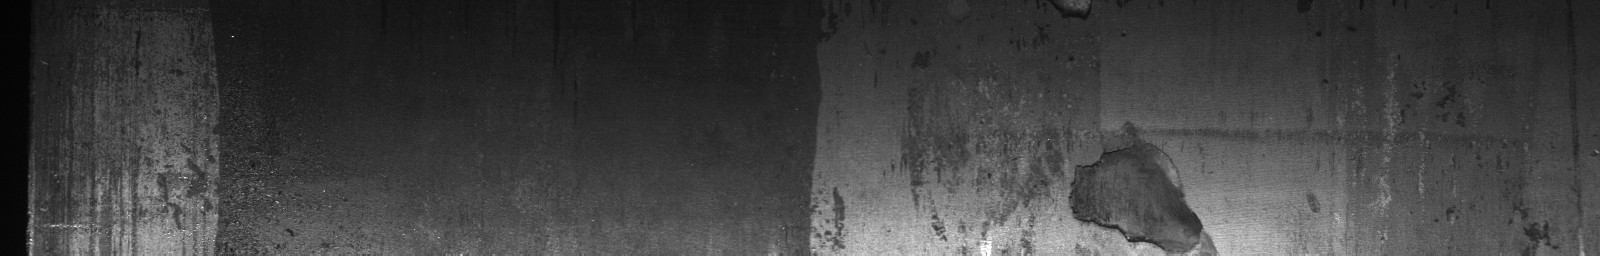

In [ ]:
img_id = train["ImageId"][101]
img_path = train_path / img_id
im = Image.open(img_path)
im

In [ ]:
height, width = im.shape
height, width

(256, 1600)

## Functions

In [ ]:
#export
def defeat_position(img_id: str, class_id: int, df:pd.DataFrame=train):
    """
    Get coordinates of defects `(x, y)` given an ImageId and a ClassId 
    
    Attributes
    ---------
    df: pd.DataFrame
        Train df

    img_id: str
        ImageId in df, image name with suffix

    class_id: int
        ClassId in df, type of defect

    Returns
    ---------
    x : np.ndarray
        
    y : np.ndarray
    """
    # Select the image to mask
    # cond = df.ImageId_ClassId == f"{img_id}_{class_id}"
    cond = (df.ImageId == img_id) & (df.ClassId == class_id)
    train_s = df[cond]
    
    encoded_pixels = [int(i) for i in train_s.EncodedPixels.values[0].split(" ")]

    pixcels = []
    pos_pixels = encoded_pixels[0:len(encoded_pixels):2]
    offs_pixels = encoded_pixels[1:len(encoded_pixels):2]
    
    for pos, offset in zip(pos_pixels, offs_pixels):
        pixcels.extend(list(range(pos, pos+offset)))
        
    pixcels = np.array(pixcels)    
    x = pixcels // 256
    y = pixcels % 256  
    
    return x, y

In [ ]:
#export
def rle_to_mask(rle: str, class_id: int, height: int, width: int) -> np.ndarray:
    """
    Convert RLE encoded pixels to numpy array for only one class_id
    
    Attributes
    ---------
    rle: str
        Run Length Encoded pixels from training csv

    class_id: int
        ClassId in df, type of defect

    height: int

    width: int

    Returns
    ---------
    mask: np.ndarray
        the mask has the class_id as values
    """    
    rows, cols = height, width
    mask = np.zeros(rows*cols, dtype=np.uint8)
    
    if rle == -1:
        return mask.reshape(cols, rows).T
    
    encoded_pixels = [int(i) for i in rle.split(" ")]

    rle_pairs = np.array(encoded_pixels).reshape(-1, 2) # (n, 2) as [[pos, offs], ... ]
    
    for index, length in rle_pairs:
        index -= 1
        mask[index : (index + length)] = class_id
    
    mask = mask.reshape(cols, rows)    
    return mask.T

In [ ]:
#export
def multi_rle_to_mask(img_path: str, df:pd.DataFrame=train_all) -> np.ndarray:
    """
    Convert all RLE encoded pixels for an image and returns the mask

    Parameters
    ---------
    df: pd.DataFrame
        Train df

    img_path: str
        Image path

    Returns
    -------
    x : np.ndarray
        
    y : np.ndarray
    """   
    height, width = 256, 1600
    
    def build_mask(df) -> np.ndarray:
        masks = defaultdict(np.ndarray)
        for num, row in enumerate(df.itertuples()):
            masks[num] = rle_to_mask(row.EncodedPixels, row.ClassId, height, width)

        mask = masks.pop(0)
        
        items_left = len(masks)
        if items_left:
            for item in range(items_left):
                mask_to_add = masks.get(item + 1)
                mask = np.add(mask, mask_to_add)
                
        return mask
   
    img_id = img_path.name
    img_df = df.loc[df["ImageId"] == img_id]
    return build_mask(img_df)

In [ ]:
#export
def img_with_mask(img_path:str):
    return np.array(Image.open(img_path)), multi_rle_to_mask(img_path)

In [ ]:
#export
def plot_defected_image(img_path: str, df:pd.DataFrame=train):
    """
    Plot image with segmented area

    Parameters
    ----------
    df: pandas.DataFrame
        Train df

    img_path : str
        Image path to be visualized
    """
    def color(x, y, classid):
        if classid == 4:
            im[y, x, 1] += 50
            im[y, x, 2] += 50
        else:
            im[y, x, classid-1] += 50
            
    def plot(im, imgid, classids):
        clip_im = np.clip(im, 0, 255)
        title = "ImageId: {} - ClassId: {}".format(imgid, " ".join(map(str, classids)))
        
        plt.figure(figsize=(25,5))
        plt.imshow(clip_im)
        plt.xticks([]);plt.yticks([]);
        plt.title(title, fontsize=20)
        plt.show()
    
    im = np.array(Image.open(img_path))
        
    img_id = img_path.name
    df = df.loc[df["ImageId"] == img_id]
    
    classids = []
    for img in df.itertuples(index=False):
        classids.append(img.ClassId)
        classid = img.ClassId
        
        x, y = defeat_position(img_id, classid)
        
        color(x,y,classid)
        
    plot(im, img_id, classids)

In [ ]:
#export
def get_perm_imgs_path(train_pfiles: L, df: pd.DataFrame) -> L:
    """
    Return img Path list of selected df

    Parameters
    ----------
    train_pfiles : L
        list of paths of all imgs
    df : pandas.DataFrame
        Train df

    Returns
    -------
    L
        List of selected paths in the train `df`
    """
    imgId_vals = df["ImageId"].drop_duplicates().values
    path_idx = train_pfiles.argwhere(lambda x: x.name in imgId_vals)
    sel_paths = train_pfiles[path_idx]
    idx = get_random_idx(len(sel_paths))
    return sel_paths[idx]

In [ ]:
#export
def get_random_idx(n: int) -> np.ndarray:
    """
    Return a random sequence of size `n`

    Parameters
    ----------
    n : int
        Size of array

    Returns
    -------
    np.ndarray
    """
    rng = np.random.default_rng()
    return rng.permutation(n)

In [ ]:
#export
def show_defects(class_id=None, n=20, only_defects=True, multi_defects=False):
    """
    Plot multiple images
    
    Attributes:
    -----------

        class_id: str or int
        If provided, all plots have this class_id

        n: int
        Num of images to plot
        
        only_defects : bool, default True
        If False it shows even the no faulty images
        
        multi_defects : bool, default False
        If True it shows imgs with multi defects
        
    Returns: None
    """
    df = train_multi
    
    cond_no_defects = df["ClassId_multi"] == '0'
    cond_multi_defects = df["ClassId_multi"].map(lambda x: len(x) > 1)
    cond_classId = df["ClassId_multi"].map(lambda x: str(class_id) in x)


    df = df.loc[cond_no_defects]    if not only_defects else df.loc[~cond_no_defects]    
    df = df.loc[cond_multi_defects] if multi_defects    else df.loc[~cond_multi_defects]
    df = df.loc[cond_classId]       if class_id         else df
        
    perm_paths = get_perm_imgs_path(train_pfiles, df)
    for img_path in perm_paths[:n]:
        plot_defected_image(img_path)

## From RLE to Masks

In the csv file there's the EncodedPixels that follows a run-length encoding (RLE) rule, a sequence of pair values that contains a start position and a run length with the space as the delimiter. E.g. `1 3 10 5` means pixels `(1,2,3)` and `(10,11,12,13,14)`.

           ImageId  ClassId
101  038f14456.jpg        4


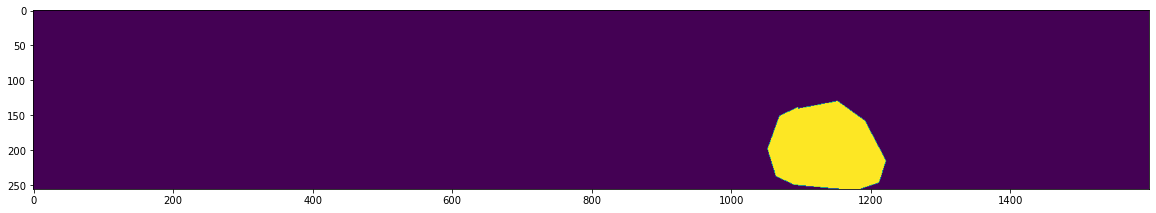

In [ ]:
tmp_df = train[train['ImageId'] == img_id]
print(tmp_df[["ImageId", "ClassId"]])
im = multi_rle_to_mask(train_path/img_id)

plt.figure(figsize=(20,5))
plt.imshow(im)
plt.show()

In [ ]:
# img_path = train_pfiles[1001]
img_path = train_path / "101648543.jpg"
im, mask = img_with_mask(img_path)
im.shape, mask.shape

((256, 1600, 3), (256, 1600))

It works even with images with no faulty images.

## Visualize one faulty image

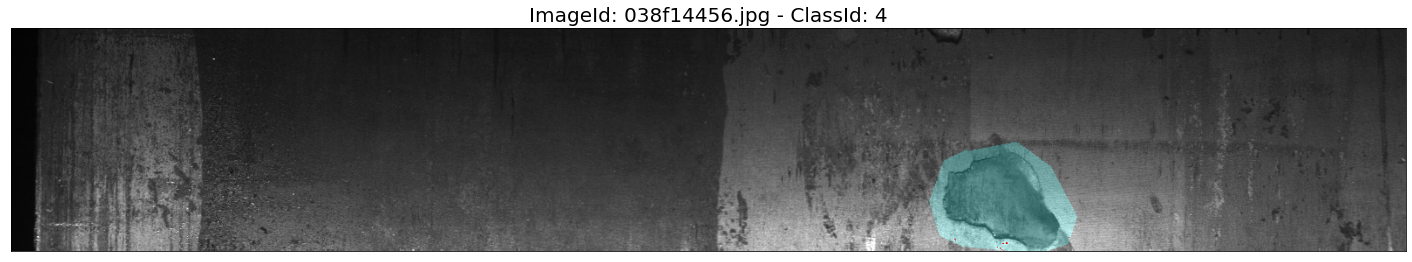

In [ ]:
im_test = plot_segmented_image(train_path / img_id)

## Visualize ClassId defects

To visualize image defects, there's a useful function to select random paths.

In [ ]:
get_perm_imgs_path(train_pfiles, train_all)[:5]

(#5) [Path('data/severstal/train_images/d3e44d1b4.jpg'),Path('data/severstal/train_images/72df2d40d.jpg'),Path('data/severstal/train_images/5aadb38a5.jpg'),Path('data/severstal/train_images/d72037f3c.jpg'),Path('data/severstal/train_images/e58764ee5.jpg')]

Defects of `ClassId=1`

In [ ]:
#show_defects(class_id=1, n=5, multi_defects=True)

Defects of `ClassId=2`

In [ ]:
#show_defects(class_id=2, n=20)

Defects of `ClassId=3`

In [ ]:
#show_defects(class_id=3, n=20)

Defects of `ClassId=4`

In [ ]:
#show_defects(class_id=4, n=20)

# Export

In [ ]:
!python notebook2script.py 02_steel_detection_EDA.ipynb

Converted 02_steel_detection_EDA.ipynb to exp/nb_02.py
